#### Задание (0/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (0/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [x] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (0/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com


In [138]:
import pandas as pd

# Подготовка данных

Подгружаем данные

In [139]:
average_income_in_countries=pd.read_csv('https://raw.githubusercontent.com/4yDo-l0do/Avito_AAA/main/Pandas/csvData.csv')
sub=pd.read_csv('https://raw.githubusercontent.com/4yDo-l0do/Avito_AAA/main/Pandas/Netflix%20subscription%20fee%20Dec-2021.csv')
continents=pd.read_csv('https://raw.githubusercontent.com/4yDo-l0do/Avito_AAA/main/Pandas/Continent.csv')
currencies=pd.read_csv('https://raw.githubusercontent.com/4yDo-l0do/Avito_AAA/main/Pandas/curr.csv')

### Данные среднего дохода в зависимости от страны

In [140]:
average_income_in_countries=average_income_in_countries.rename(columns={'country':'Country'})

In [141]:
average_income_in_countries.head(2)

,Country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Luxembourg,26321,31376,124590,634.814
1,United Arab Emirates,24292,27017,70089,9991.089


Убираем лишнее

In [142]:
average_income_in_countries=average_income_in_countries.drop(columns=['medianIncome', 'gdpPerCapitaPPP', 'pop2021'])

In [143]:
average_income_in_countries.head(2)

,Country,meanIncome
0,Luxembourg,31376
1,United Arab Emirates,27017


### Континенты

In [144]:
continents.head(2)

,Unnamed: 0,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe


Убираем лишнее

In [145]:
continents=continents.drop(columns=['Unnamed: 0', 'No', 'ISO-alpha3 Code', 'M49 Code','Region 1', 'Region 2'])

In [146]:
continents.head(2)

,Country or Area,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe


Переименуем колонки 

In [147]:
continents=continents.rename(columns={'Country or Area':'Country'})

In [148]:
continents.head(2)

,Country,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe


### Валюта

In [149]:
currencies.head(2)

,Unnamed: 0,Country,CountryCode,Currency,Code
0,0,NEW ZEALAND,NZ,New Zealand Dollars,NZD
1,1,COOK ISLANDS,CK,New Zealand Dollars,NZD


In [150]:
currencies.columns

Index(['Unnamed: 0', 'Country', 'CountryCode', 'Currency', 'Code'], dtype='object')

Убираем лишнее

In [151]:
currencies=currencies.drop(columns=['Unnamed: 0', 'Code','CountryCode'])

In [152]:
currencies.head(2)

,Country,Currency
0,NEW ZEALAND,New Zealand Dollars
1,COOK ISLANDS,New Zealand Dollars


Меняем регистр названия стран

In [153]:
currencies['Country']=currencies['Country'].apply(lambda x: x.title())

In [154]:
currencies.head(2)

,Country,Currency
0,New Zealand,New Zealand Dollars
1,Cook Islands,New Zealand Dollars


# Соединение данных

In [155]:
df=pd.merge(sub, average_income_in_countries, how='left', on='Country')

### Проверим на "пропуски" ср.зарплаты

In [156]:
df[df.meanIncome.isnull()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,NaN
19,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,NaN
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,NaN
27,id,Indonesia,3887,2449,1438,8.36,10.66,12.96,NaN
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,NaN
38,mc,Monaco,5804,3806,1998,9.03,13.54,18.06,NaN
40,nz,New Zealand,6084,4003,2081,8.80,12.53,16.94,NaN
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,NaN
50,sg,Singapore,6303,4109,2194,9.51,12.81,16.11,NaN


вручную найду пропущенные данные

In [157]:
propuski_meanIncome=pd.read_csv('https://raw.githubusercontent.com/4yDo-l0do/Avito_AAA/main/Pandas/propusk1.csv', delimiter=';')
propuski_meanIncome['meanIncome']=propuski_meanIncome['meanIncome']*12

In [158]:
propuski_meanIncome

,Country,meanIncome
0,Czechia,21420
1,Gibraltar,36132
2,Hong Kong,24180
3,Indonesia,13092
4,Liechtenstein,65760
5,Monaco,73980
6,New Zealand,44316
7,San Marino,33432
8,Singapore,47928


Присоеденим пропуски снизу

In [159]:
average_income_in_countries=pd.concat([average_income_in_countries, propuski_meanIncome])

Заново сделаем джоин 

In [160]:
df=pd.merge(sub, average_income_in_countries, how='left', on='Country')

Проверим

In [161]:
df[df.meanIncome.isnull()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome


In [162]:
df.head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6935
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,21329
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,20718
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,17917
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,4787


### Проверим на "пропуски" континенты

In [163]:
df=pd.merge(df, continents, how='left', on='Country')

In [164]:
df[df.Continent.isnull()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,4787,NaN
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,24180,NaN
37,md,Moldova,3937,2473,1464,9.03,11.29,13.54,3590,NaN
48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,7275,NaN
53,kr,South Korea,5195,3334,1861,8.07,11.47,14.45,14316,NaN
57,tw,Taiwan,5105,3134,1971,9.74,11.90,14.07,16355,NaN
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,18133,NaN
62,us,United States,5818,3826,1992,8.99,13.99,17.99,25332,NaN
64,ve,Venezuela,4797,3154,1643,7.99,10.99,13.99,3741,NaN


вручную найду пропущенные данные

In [165]:
propuski_continent=pd.read_csv('https://raw.githubusercontent.com/4yDo-l0do/Avito_AAA/main/Pandas/propuski2.csv',delimiter=';')

In [166]:
propuski_continent

,Country,Continent
0,Bolivia,South America
1,Hong Kong,Asia
2,Moldova,Europe
3,Russia,Europe
4,South Korea,Asia
5,Taiwan,Asia
6,United Kingdom,Europe
7,United States,North America
8,Venezuela,South America


Присоеденим пропуски снизу

In [167]:
continents=pd.concat([continents, propuski_continent])

Заново сделаем джоин

In [168]:
df=df.drop(columns=['Continent'])

In [169]:
df=pd.merge(df, continents, how='left', on='Country')

Проверим

In [170]:
df[df.meanIncome.isnull()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent


In [171]:
df

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6935,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,21329,Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,20718,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,17917,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,4787,South America
...,...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,5010,Europe
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,18133,Europe
62,us,United States,5818,3826,1992,8.99,13.99,17.99,25332,North America
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,9888,South America


### Проверим на "пропуски" валюту

In [172]:
df=pd.merge(df, currencies, how='left', on='Country')

In [173]:
df.head(2)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent,Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,6935,South America,Peso
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,21329,Oceania,Australian Dollars


In [174]:
df[df.Currency.isnull()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent,Currency


Видим что пропущенных значений нет 

# EDA

### 1. График корреляции между средним доходом и ценой подписки

<AxesSubplot:xlabel='meanIncome', ylabel='Cost Per Month - Basic ($)'>

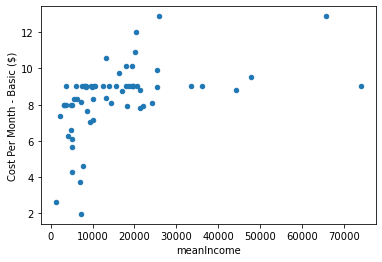

In [175]:
df.plot(y='Cost Per Month - Basic ($)', x='meanIncome', kind="scatter")

<AxesSubplot:xlabel='meanIncome', ylabel='Cost Per Month - Standard ($)'>

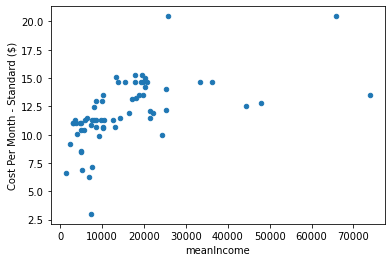

In [176]:
df.plot(y='Cost Per Month - Standard ($)', x='meanIncome', kind="scatter")

<AxesSubplot:xlabel='meanIncome', ylabel='Cost Per Month - Premium ($)'>

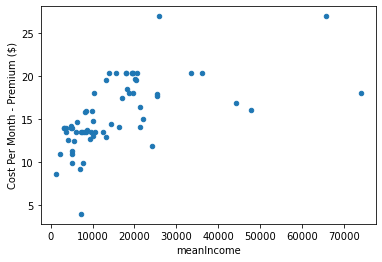

In [177]:
df.plot(y='Cost Per Month - Premium ($)', x='meanIncome', kind="scatter")

### 2. Cредняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [178]:
df.groupby(['Currency']).agg({'Cost Per Month - Basic ($)': 'mean', 'Cost Per Month - Standard ($)': 'mean', 'Cost Per Month - Premium ($)': 'mean'})

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Currency,,,
Australian Dollars,7.840000,12.120000,16.390000
Baht,8.340000,10.430000,12.520000
Bolivar,7.990000,10.990000,13.990000
Boliviano,7.990000,10.990000,13.990000
Brazil,4.610000,7.110000,9.960000
Canadian Dollar,7.910000,11.870000,15.030000
Chilean Peso,7.070000,9.910000,12.740000
Costa Rican Colon,8.990000,12.990000,15.990000
Croatian Dinar,9.030000,11.290000,13.540000


### 3. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [179]:
df.groupby(['Continent']).agg({'Cost Per Month - Basic ($)': 'mean', 'Cost Per Month - Standard ($)': 'mean', 'Cost Per Month - Premium ($)': 'mean'})

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
Africa,6.260000,10.050000,12.580000
Asia,7.636667,10.404167,12.966667
Europe,9.230294,13.304412,17.545588
North America,8.081667,11.876667,15.205000
Oceania,8.320000,12.325000,16.665000
South America,6.709000,9.619000,12.555000


### 4. Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

#### Basic:

In [180]:
df[df['Country'] == 'Czechia']['Cost Per Month - Basic ($)']*12/df[df['Country'] == 'Czechia']['meanIncome']

12    0.004947
dtype: float64

#### Standard:

In [181]:
df[df['Country'] == 'Czechia']['Cost Per Month - Standard ($)']*12/df[df['Country'] == 'Czechia']['meanIncome']

12    0.006437
dtype: float64

#### Premium:

In [182]:
df[df['Country'] == 'Czechia']['Cost Per Month - Premium ($)']*12/df[df['Country'] == 'Czechia']['meanIncome']

12    0.007927
dtype: float64

### 5. Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [183]:
df.sort_values('No. of TV Shows', ascending= False).head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent,Currency
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,21420,Europe,Koruna
51,sk,Slovakia,7035,5055,1980,9.03,11.29,13.54,8408,Europe,Koruna
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54,7474,Europe,Lev
24,hu,Hungary,6884,4802,2082,7.64,10.71,13.78,8613,Europe,Forint
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,18133,Europe,Sterling


### 6. Какой процент среднего дохода россиянина будет составлять подписка Netflix?

#### Basic:

In [184]:
df[df['Country'] == 'Russia']['Cost Per Month - Basic ($)']*12/df[df['Country'] == 'Russia']['meanIncome']*100

48    1.341031
dtype: float64

#### Standard:

In [185]:
df[df['Country'] == 'Russia']['Cost Per Month - Standard ($)']*12/df[df['Country'] == 'Russia']['meanIncome']*100

48    1.788041
dtype: float64

#### Premium:

In [186]:
df[df['Country'] == 'Russia']['Cost Per Month - Premium ($)']*12/df[df['Country'] == 'Russia']['meanIncome']*100

48    2.236701
dtype: float64

### 7.На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [187]:
df['Cost Per Title']=df['Total Library Size']/df['Cost Per Month - Basic ($)']

In [188]:
df=df.sort_values('Cost Per Title', ascending= False)

In [189]:
df[df.Country=='Russia']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent,Currency,Cost Per Title
48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,7275,Europe,Ruble,702.460025


### 8. В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [190]:
df.head(1)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent,Currency,Cost Per Title
59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,7267,Asia,Lira,2354.822335


По Cost Per Title в Турции

In [191]:
df.sort_values('Cost Per Month - Basic ($)').head(1)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),meanIncome,Continent,Currency,Cost Per Title
59,tr,Turkey,4639,2930,1709,1.97,3.0,4.02,7267,Asia,Lira,2354.822335


По цене тоже в Турции